<a href="https://colab.research.google.com/github/rikiindrmwn/all-about-data/blob/main/Analisa%20Penjualan%20Produk/Analisa_Penjualan_Produk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset = pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/LEARN PYTHON/ANALISA PENJUALAN PRODUK/Online Retail.xlsx')
df = dataset.copy()

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


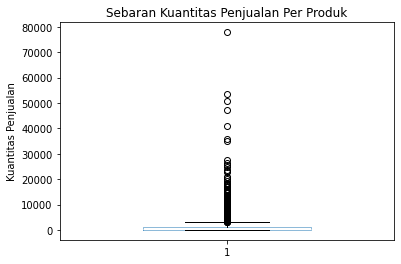

In [43]:
kuantitas_penjualan_per_produk = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum()
kuantitas_penjualan_per_produk

grafik_sebaran_kuantitas_penjualan_per_produk = plt.subplot()
grafik_sebaran_kuantitas_penjualan_per_produk.boxplot(
    kuantitas_penjualan_per_produk,
    widths = 0.5,
    medianprops={"color": "white", "linewidth": 0.5},
    boxprops={"color": "C0","linewidth": 0.5}
)

grafik_sebaran_kuantitas_penjualan_per_produk.set_title('Sebaran Kuantitas Penjualan Per Produk')
grafik_sebaran_kuantitas_penjualan_per_produk.set_ylabel('Kuantitas Penjualan')
plt.show()

In [6]:
kuantitas_penjualan_per_produk.describe()

count     3941.000000
mean      1436.432631
std       3604.642278
min          1.000000
25%         57.000000
50%        378.000000
75%       1398.000000
max      80995.000000
Name: Quantity, dtype: float64

In [7]:
jumlah_transaksi_penjualan_per_bulan = df[df['Quantity'] > 0].set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
jumlah_transaksi_penjualan_per_bulan

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

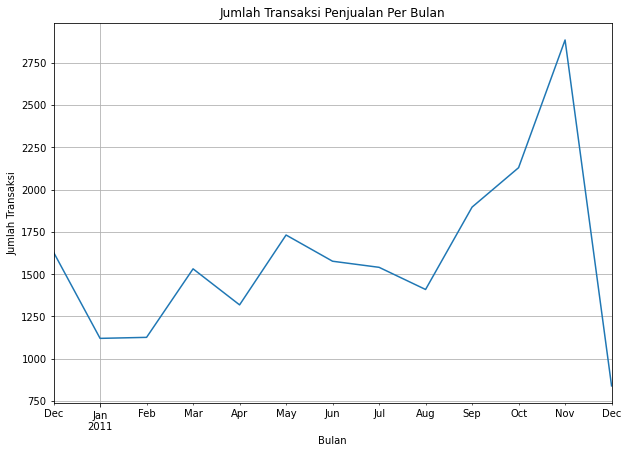

In [44]:
grafik_jumlah_transaksi_penjualan_per_bulan = pd.DataFrame(jumlah_transaksi_penjualan_per_bulan).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)
grafik_jumlah_transaksi_penjualan_per_bulan.set_title('Jumlah Transaksi Penjualan Per Bulan')
grafik_jumlah_transaksi_penjualan_per_bulan.set_xlabel('Bulan')
grafik_jumlah_transaksi_penjualan_per_bulan.set_ylabel('Jumlah Transaksi')
plt.show()

In [9]:
penjualan_bulan_desember_2011 = df[df['InvoiceDate'] >= '2011-12-01']['InvoiceDate']
penjualan_bulan_desember_2011

516384   2011-12-01 08:12:00
516385   2011-12-01 08:14:00
516386   2011-12-01 08:14:00
516387   2011-12-01 08:14:00
516388   2011-12-01 08:18:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25525, dtype: datetime64[ns]

In [10]:
df = df[(df['Quantity'] > 0) & (df['InvoiceDate'] < '2011-12-01')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom


In [11]:
df['Total'] = df['Quantity'] * df['UnitPrice']
revenue_per_bulan = df.set_index('InvoiceDate')['Total'].resample('M').sum()
revenue_per_bulan

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Total, dtype: float64

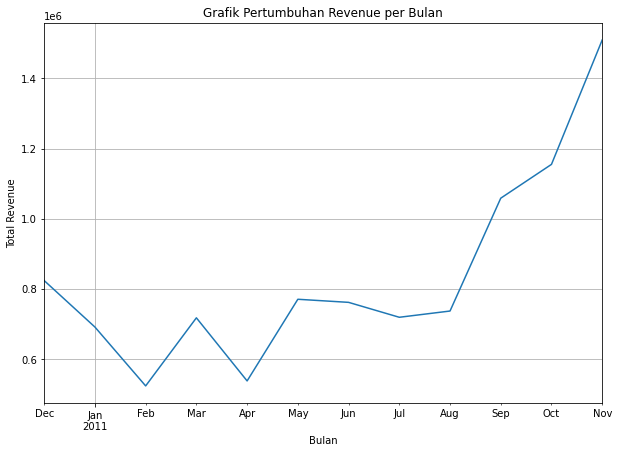

In [38]:
grafik_revenue_per_bulan = pd.DataFrame(revenue_per_bulan).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

grafik_revenue_per_bulan.set_title('Grafik Pertumbuhan Revenue per Bulan')
grafik_revenue_per_bulan.set_xlabel('Bulan')
grafik_revenue_per_bulan.set_ylabel('Total Revenue')

plt.show()

In [13]:
top_5_produk_terlaris = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_produk_terlaris

StockCode
23166     77826
84077     53680
22197     50704
85099B    47373
85123A    40849
Name: Quantity, dtype: int64

In [14]:
penjualan_top_5_produk_per_bulan = pd.DataFrame(df[df['StockCode'].isin(top_5_produk_terlaris.index.values)].set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())
penjualan_top_5_produk_per_bulan

Quantity
InvoiceDate StockCode          
2010-12-31  22197          2738
            84077          5195
            85099B         2152
            85123A         3753
2011-01-31  22197          1824
            23166         74215
            84077          1492
            85099B         2747
            85123A         5533
2011-02-28  22197          2666
            84077          3518
            85099B         3080
            85123A         1877
2011-03-31  22197          2803
            84077          3888
            85099B         5282
            85123A         1999
2011-04-30  22197          1869
            84077         10239
            85099B         2456
            85123A         3843
2011-05-31  22197          6849
            23166           801
            84077          4949
            85099B         3621
            85123A         4006
2011-06-30  22197          2095
            23166           397
            84077          2122
            85099B         3682
            85123A         5676
2011-07-31  22197          1876
            23166           731
            84077          3762
            85099B         3129
            85123A         3009
2011-08-31  22197          5421
            23166           427
            84077          2261
            85099B         5502
            85123A         2076
2011-09-30  22197          4196
            23166           346
            84077          3515
            85099B         4401
            85123A         2478
2011-10-31  22197          5907
            23166           250
            84077          8180
            85099B         5412
            85123A         1689
2011-11-30  22197         12460
            23166           659
            84077          4559
            85099B         5909
            85123A         4910

In [15]:
pivot_penjualan_top_5_produk_per_bulan = penjualan_top_5_produk_per_bulan.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
pivot_penjualan_top_5_produk_per_bulan

Quantity                                  
StockCode      22197    23166    84077  85099B  85123A
InvoiceDate                                           
2010-12-31    2738.0      0.0   5195.0  2152.0  3753.0
2011-01-31    1824.0  74215.0   1492.0  2747.0  5533.0
2011-02-28    2666.0      0.0   3518.0  3080.0  1877.0
2011-03-31    2803.0      0.0   3888.0  5282.0  1999.0
2011-04-30    1869.0      0.0  10239.0  2456.0  3843.0
2011-05-31    6849.0    801.0   4949.0  3621.0  4006.0
2011-06-30    2095.0    397.0   2122.0  3682.0  5676.0
2011-07-31    1876.0    731.0   3762.0  3129.0  3009.0
2011-08-31    5421.0    427.0   2261.0  5502.0  2076.0
2011-09-30    4196.0    346.0   3515.0  4401.0  2478.0
2011-10-31    5907.0    250.0   8180.0  5412.0  1689.0
2011-11-30   12460.0    659.0   4559.0  5909.0  4910.0

In [16]:
pivot_penjualan_top_5_produk_per_bulan = pivot_penjualan_top_5_produk_per_bulan.reset_index()
pivot_penjualan_top_5_produk_per_bulan = pivot_penjualan_top_5_produk_per_bulan.set_index('InvoiceDate')
pivot_penjualan_top_5_produk_per_bulan

Quantity                                  
StockCode      22197    23166    84077  85099B  85123A
InvoiceDate                                           
2010-12-31    2738.0      0.0   5195.0  2152.0  3753.0
2011-01-31    1824.0  74215.0   1492.0  2747.0  5533.0
2011-02-28    2666.0      0.0   3518.0  3080.0  1877.0
2011-03-31    2803.0      0.0   3888.0  5282.0  1999.0
2011-04-30    1869.0      0.0  10239.0  2456.0  3843.0
2011-05-31    6849.0    801.0   4949.0  3621.0  4006.0
2011-06-30    2095.0    397.0   2122.0  3682.0  5676.0
2011-07-31    1876.0    731.0   3762.0  3129.0  3009.0
2011-08-31    5421.0    427.0   2261.0  5502.0  2076.0
2011-09-30    4196.0    346.0   3515.0  4401.0  2478.0
2011-10-31    5907.0    250.0   8180.0  5412.0  1689.0
2011-11-30   12460.0    659.0   4559.0  5909.0  4910.0

In [17]:
pivot_penjualan_top_5_produk_per_bulan.columns = pivot_penjualan_top_5_produk_per_bulan.columns.droplevel(0)
pivot_penjualan_top_5_produk_per_bulan

StockCode,22197,23166,84077,85099B,85123A
InvoiceDate,,,,,
2010-12-31,2738.0,0.0,5195.0,2152.0,3753.0
2011-01-31,1824.0,74215.0,1492.0,2747.0,5533.0
2011-02-28,2666.0,0.0,3518.0,3080.0,1877.0
2011-03-31,2803.0,0.0,3888.0,5282.0,1999.0
2011-04-30,1869.0,0.0,10239.0,2456.0,3843.0
2011-05-31,6849.0,801.0,4949.0,3621.0,4006.0
2011-06-30,2095.0,397.0,2122.0,3682.0,5676.0
2011-07-31,1876.0,731.0,3762.0,3129.0,3009.0
2011-08-31,5421.0,427.0,2261.0,5502.0,2076.0


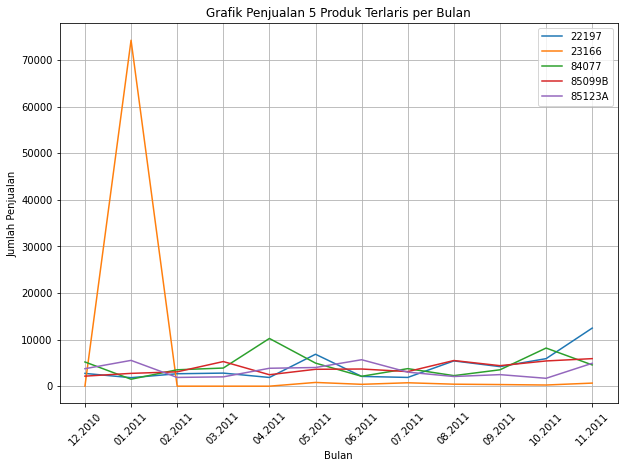

In [45]:
grafik_penjualan_top_5_produk_terlaris_per_bulan = pd.DataFrame(
    pivot_penjualan_top_5_produk_per_bulan.values
).plot(
    figsize=(10,7),
    grid=True,
)

grafik_penjualan_top_5_produk_terlaris_per_bulan.legend(pivot_penjualan_top_5_produk_per_bulan.columns, loc='best')
grafik_penjualan_top_5_produk_terlaris_per_bulan.set_title('Grafik Penjualan 5 Produk Terlaris per Bulan')
grafik_penjualan_top_5_produk_terlaris_per_bulan.set_xlabel('Bulan')
grafik_penjualan_top_5_produk_terlaris_per_bulan.set_ylabel('Jumlah Penjualan')

plt.xticks(
    range(len(pivot_penjualan_top_5_produk_per_bulan.index)), 
    [x.strftime('%m.%Y') for x in pivot_penjualan_top_5_produk_per_bulan.index], 
    rotation=45
)
plt.show()

In [19]:
tagihan_pelanggan = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Total': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

tagihan_pelanggan

,InvoiceNo,InvoiceDate,Total,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
19926,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark
19927,579885,2011-11-30 17:37:00,1075.36,15444.0,United Kingdom
19928,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
19929,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [20]:
jumlah_pelanggan_membeli_berulang_per_bulan = tagihan_pelanggan.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
jumlah_pelanggan_membeli_berulang_per_bulan

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [21]:
jumlah_pelanggan_per_bulan = tagihan_pelanggan.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
jumlah_pelanggan_per_bulan

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [22]:
persentase_pembelian_berulang_per_bulan = round((jumlah_pelanggan_membeli_berulang_per_bulan/jumlah_pelanggan_per_bulan)*100, 2)
persentase_pembelian_berulang_per_bulan

InvoiceDate
2010-12-31    29.72
2011-01-31    20.65
2011-02-28    20.18
2011-03-31    20.84
2011-04-30    19.86
2011-05-31    26.61
2011-06-30    22.20
2011-07-31    23.92
2011-08-31    21.18
2011-09-30    21.48
2011-10-31    23.75
2011-11-30    32.49
Freq: M, Name: CustomerID, dtype: float64

In [23]:
perbandingan_pelanggan = pd.DataFrame(
    jumlah_pelanggan_membeli_berulang_per_bulan
)
perbandingan_pelanggan['SemuaPelanggan'] = jumlah_pelanggan_per_bulan
perbandingan_pelanggan.rename(columns={'CustomerID':'PelangganPembelianBerulang'}, inplace=True)
perbandingan_pelanggan

,PelangganPembelianBerulang,SemuaPelanggan
InvoiceDate,,
2010-12-31,263,885
2011-01-31,153,741
2011-02-28,153,758
2011-03-31,203,974
2011-04-30,170,856
2011-05-31,281,1056
2011-06-30,220,991
2011-07-31,227,949
2011-08-31,198,935


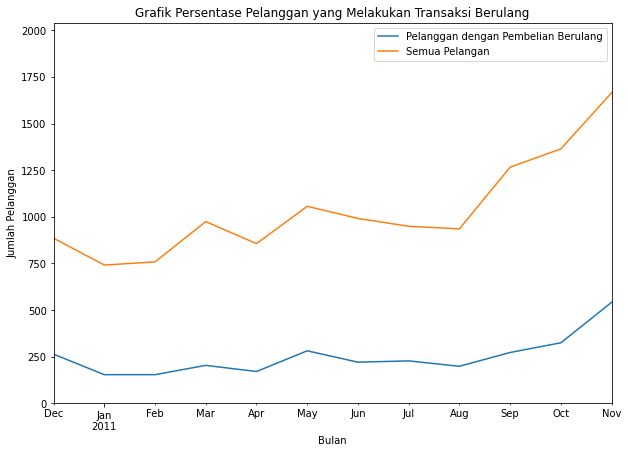

In [40]:
grafik_perbandingan_pelanggan = perbandingan_pelanggan.plot(
    kind='line',
    figsize=(10,7),
)

grafik_perbandingan_pelanggan.legend(
    ['Pelanggan dengan Pembelian Berulang', 'Semua Pelangan'],
    loc='best'
)

grafik_perbandingan_pelanggan.set_ylim([0, perbandingan_pelanggan['PelangganPembelianBerulang'].values.max()+1500])
grafik_perbandingan_pelanggan.set_title('Grafik Persentase Pelanggan yang Melakukan Transaksi Berulang')
grafik_perbandingan_pelanggan.set_xlabel('Bulan')
grafik_perbandingan_pelanggan.set_ylabel('Jumlah Pelanggan')

plt.show()

In [25]:
total_pembelian_pelanggan_berulang_per_bulan = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'])['Total'].filter(lambda x: len(x) > 1).resample('M').sum()
total_pembelian_pelanggan_berulang_per_bulan

InvoiceDate
2010-12-31     561185.200
2011-01-31     486023.930
2011-02-28     439572.440
2011-03-31     590358.020
2011-04-30     461628.581
2011-05-31     668473.320
2011-06-30     657552.860
2011-07-31     594593.001
2011-08-31     640390.730
2011-09-30     945171.272
2011-10-31    1034087.570
2011-11-30    1150586.570
Freq: M, Name: Total, dtype: float64

In [26]:
total_pembelian_pelanggan_tidak_berulang_per_bulan = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID'])['Total'].filter(lambda x: len(x) == 1).resample('M').sum()
total_pembelian_pelanggan_tidak_berulang_per_bulan

InvoiceDate
2010-12-31    11528.69
2011-01-31    83421.11
2011-02-28     7564.91
2011-03-31     5142.74
2011-04-30     7571.78
2011-05-31    10121.24
2011-06-30     3660.83
2011-07-31     5498.01
2011-08-31     4953.17
2011-09-30     7667.11
2011-10-31     5231.22
2011-11-30    11230.81
Freq: M, Name: Total, dtype: float64

In [27]:
perbandingan_revenue = pd.DataFrame(
    data=total_pembelian_pelanggan_berulang_per_bulan
)

perbandingan_revenue.rename(columns={'Total':'RevenuePelangganBerulang'})
perbandingan_revenue['RevenuePelangganTidakBerulang'] = total_pembelian_pelanggan_tidak_berulang_per_bulan
perbandingan_revenue = perbandingan_revenue

perbandingan_revenue.head()

,Total,RevenuePelangganTidakBerulang
InvoiceDate,,
2010-12-31,561185.200,11528.69
2011-01-31,486023.930,83421.11
2011-02-28,439572.440,7564.91
2011-03-31,590358.020,5142.74
2011-04-30,461628.581,7571.78


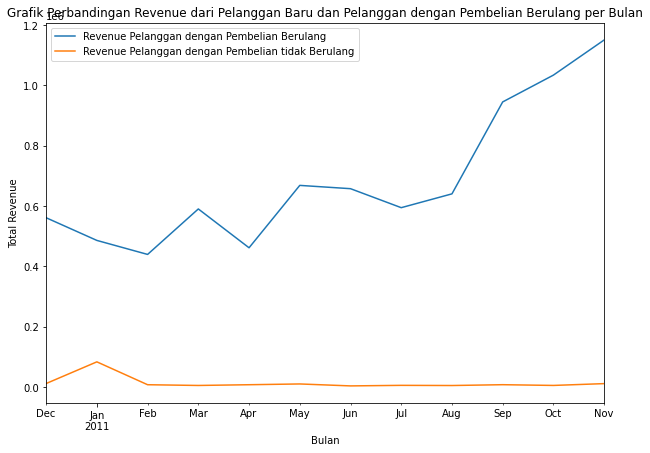

In [42]:
grafik_perbandingan_revenue = perbandingan_revenue.plot(
    kind='line',
    figsize=(10,7)
)

grafik_perbandingan_revenue.legend(
    labels=['Revenue Pelanggan dengan Pembelian Berulang', 'Revenue Pelanggan dengan Pembelian tidak Berulang'],
    loc='best'
)

grafik_perbandingan_revenue.set_title('Grafik Perbandingan Revenue dari Pelanggan Baru dan Pelanggan dengan Pembelian Berulang per Bulan')
grafik_perbandingan_revenue.set_xlabel('Bulan')
grafik_perbandingan_revenue.set_ylabel('Total Revenue')

plt.show()

In [29]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [30]:
top_5_negara_dengan_kuantitas_penjualan_terbanyak = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
top_5_negara_dengan_kuantitas_penjualan_terbanyak

Country
United Kingdom          4445749
Netherlands              192979
EIRE                     143325
Germany                  115257
France                   108319
Australia                 84209
Sweden                    36043
Switzerland               30630
Spain                     27677
Japan                     26016
Belgium                   22136
Norway                    17019
Portugal                  14689
Finland                   10354
Channel Islands            9431
Italy                      8067
Denmark                    8062
Cyprus                     6361
Singapore                  5241
Hong Kong                  4773
Austria                    4733
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
Iceland                    2266
USA                        1854
Greece                     1321
United Arab Emirates        982
Malta                       970
Czech Republic              671


In [31]:
top_5_produk_paling_laku_di_uk = df[df['Country'] == 'United Kingdom'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_produk_paling_laku_di_uk

StockCode
23166     76877
84077     48207
22197     47322
85099B    43243
85123A    38805
Name: Quantity, dtype: int64

In [32]:
top_5_produk_paling_laku_di_netherlands= df[df['Country'] == 'Netherlands'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_produk_paling_laku_di_netherlands

StockCode
22629    4528
22630    4132
21212    4128
23084    3361
22326    3036
Name: Quantity, dtype: int64

In [33]:
top_5_produk_paling_laku_di_eire = df[df['Country'] == 'EIRE'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
top_5_produk_paling_laku_di_eire

StockCode
22197    1756
21212    1752
84991    1512
21790    1444
22952    1440
Name: Quantity, dtype: int64

In [34]:
top_10_customer_dengan_pembelian_paling_banyak = df.groupby(['CustomerID','Country'])['Total'].sum().sort_values(ascending=False).head(10)
top_10_customer_dengan_pembelian_paling_banyak

CustomerID  Country       
14646.0     Netherlands       268478.00
18102.0     United Kingdom    248171.76
17450.0     United Kingdom    192988.39
14911.0     EIRE              136846.14
12415.0     Australia         124914.53
14156.0     EIRE              117379.63
17511.0     United Kingdom     83683.06
16029.0     United Kingdom     81024.84
12346.0     United Kingdom     77183.60
13694.0     United Kingdom     61908.46
Name: Total, dtype: float64

# Hasil Analisa Penjualan


1.   Terjadi peningkatan jumlah transaksi penjualan yang signifikan antara bulan Agustus hingga November 2011, Namun terjadi penurunan transaksi yang signifikan pada bulan Desember 2011
2.   Penurunan jumlah transaksi yang signifikan pada bulan Desember 2011, dikerenakan data transaksi yang tersedia hanya sampai pada tanggal 9 Desember 2011
3.   Terjadi peningkatan revenue yang signifikan dan berkelanjutan dari bulan Agustus 2011 sebesar 737014.260 hingga bulan November 2011 sebesar 1509496.330.
4.   Lima produk dengan jumlah penjualan tertinggi meliputi produk dengan kode 23166, 84077, 22197, 85099B, 85123A.
5.   Produk dengan kode 23166 mengalami peningkatan penjualan yang signifikan dari bulan Desember 2010 hingga Januari 2011, Namun penjualan menurun secara drastis bahkan hampir tidak ada penjualan hingga November 2011. Kemungkinan besar, terdapat tren/peristiwa tertentu, yang menyebabkan penjualannya naik signifikan pada bulan Desember 2010 hingga Januari 2011. Sedangkan produk lainnya yang termasuk lima produk dengan jumlah penjualan tertinggi, mempunyai angka penjualan yang relatif stabil dari bulan Desember 2010 hingga bulan Novemer 2011.
6.   Pesentase pembelian berulang oleh pelanggan, semakin meningkat seiring berjalannya bulan dari Januari menuju Desember.
7.   Total Revenue yang diperoleh dari pelanggan dengan transaksi berulang, lebih tinggr dibandingkan dengan pelanggan biasa.
8.   Lima negara dengan jumlah penjualan tertinggi meliputi United Kingdom, Netherlands, EIRE, Germany, France.
9.   Penjualan terbesar dari top 5 produk terlaris berada di United Kingdom, dimana pada negera lain seperti Netherlands, EIRE, Germany, France, memiliki top 5 produk terlaris yang berbeda dengan top 5 produk terlaris yang telah disebutkan sebelumnya.



